In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.interpolate as interpolate

In [20]:
m1 = np.genfromtxt("./decay_guy_100.dat")
m = np.genfromtxt("./decay_guy_200.dat")
ms = np.genfromtxt("./decay_guy_w_energy_loss.dat")

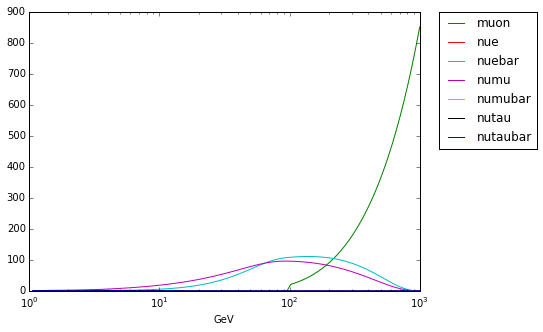

In [21]:
plt.figure(figsize=(7,5))

Es=np.logspace(4,6,50)
Surv=np.exp(-1000000/(2.2e-6*(Es/105.)*3e8))
plt.plot(Es*1e-3,Surv, ls = "dashed")

m = ms

plt.plot(m[:,0],m[:,1]*m[:,0], label = "muon")

plt.plot(m[:,0],m[:,3]*m[:,0], label = "nue")
plt.plot(m[:,0],m[:,4]*m[:,0], label = "nuebar")

plt.plot(m[:,0],m[:,5]*m[:,0], label = "numu")
plt.plot(m[:,0],m[:,6]*m[:,0], label = "numubar")

plt.plot(m[:,0],m[:,7]*m[:,0], label = "nutau")
plt.plot(m[:,0],m[:,8]*m[:,0], label = "nutaubar")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.ylim(0,200)
plt.semilogx()
plt.xlabel("GeV")

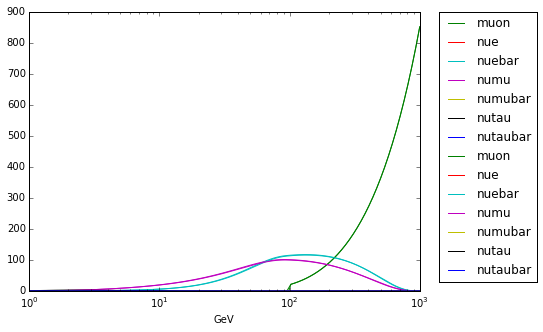

In [67]:
plt.figure(figsize=(7,5))

Es=np.logspace(4,6,50)
Surv=np.exp(-1000000/(2.2e-6*(Es/105.)*3e8))
plt.plot(Es*1e-3,Surv, ls = "dashed")

m = m1

plt.plot(m[:,0],m[:,1]*m[:,0], label = "muon")

plt.plot(m[:,0],m[:,3]*m[:,0], label = "nue")
plt.plot(m[:,0],m[:,4]*m[:,0], label = "nuebar")

plt.plot(m[:,0],m[:,5]*m[:,0], label = "numu")
plt.plot(m[:,0],m[:,6]*m[:,0], label = "numubar")

plt.plot(m[:,0],m[:,7]*m[:,0], label = "nutau")
plt.plot(m[:,0],m[:,8]*m[:,0], label = "nutaubar")

m = m2

plt.plot(m[:,0],m[:,1]*m[:,0], label = "muon")

plt.plot(m[:,0],m[:,3]*m[:,0], label = "nue")
plt.plot(m[:,0],m[:,4]*m[:,0], label = "nuebar")

plt.plot(m[:,0],m[:,5]*m[:,0], label = "numu")
plt.plot(m[:,0],m[:,6]*m[:,0], label = "numubar")

plt.plot(m[:,0],m[:,7]*m[:,0], label = "nutau")
plt.plot(m[:,0],m[:,8]*m[:,0], label = "nutaubar")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.semilogx()
plt.xlabel("GeV")

In [8]:
def Integral(m,i):
    return sum(((m[1:,i]+m[:-1,i])/2.)*(m[1:,0]-m[:-1,0]))

In [9]:
def SIntegral(m,i):
    return integrate.quad(interpolate.interp1d(m[:,0],m[:,i]),m[:,0][0],m[:,0][-1])[0]

In [10]:
SIntegral(m1,1),SIntegral(m2,1)

/usr/local/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


(620.2633636437068, 620.0083541217286)

In [11]:
900-SIntegral(m,1)

279.99164587827136

In [12]:
MuonLoss=900-Integral(m,1)
print MuonLoss

279.992449226


In [13]:
NueGain=Integral(m,3)
print NueGain
NuebarGain=Integral(m,4)
print NuebarGain

NumuGain=Integral(m,5)
print NumuGain
NumubarGain=Integral(m,6)
print NumubarGain

NutauGain=Integral(m,7)
print NutauGain
NutaubarGain=Integral(m,8)
print NutaubarGain

0.197807854706
277.01727552
270.843504696
0.0388908291059
4.20839654428
0.0349122722535


In [14]:
NueGain + NumuGain + NutauGain

275.24970909496545

In [15]:
NuebarGain + NumubarGain + NutaubarGain

277.09107862124836

In [80]:
len(m[:,5])

100

[]

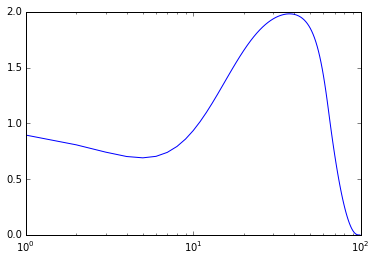

In [88]:
plt.plot(m[:,5])
plt.semilogx()

In [83]:
np.sum(m[:,5])/100.0

1.1224264295799999

In [85]:
SIntegral(m,5)

278.8046473409566

In [86]:
m[:,0]

array([    1.07152,     1.14815,     1.23027,     1.31826,     1.41254,
           1.51356,     1.62181,     1.7378 ,     1.86209,     1.99526,
           2.13796,     2.29087,     2.45471,     2.63027,     2.81838,
           3.01995,     3.23594,     3.46737,     3.71535,     3.98107,
           4.2658 ,     4.57088,     4.89779,     5.24807,     5.62341,
           6.0256 ,     6.45654,     6.91831,     7.4131 ,     7.94328,
           8.51138,     9.12011,     9.77237,    10.4713 ,    11.2202 ,
          12.0226 ,    12.8825 ,    13.8038 ,    14.7911 ,    15.8489 ,
          16.9824 ,    18.197  ,    19.4984 ,    20.893  ,    22.3872 ,
          23.9883 ,    25.704  ,    27.5423 ,    29.5121 ,    31.6228 ,
          33.8844 ,    36.3078 ,    38.9045 ,    41.6869 ,    44.6684 ,
          47.863  ,    51.2861 ,    54.9541 ,    58.8844 ,    63.0957 ,
          67.6083 ,    72.4436 ,    77.6247 ,    83.1764 ,    89.1251 ,
          95.4993 ,   102.329  ,   109.648  ,   117.49   ,   125

In [87]:
Integral(m,1)

620.26342844140004